# Homework

---

### Q1

Complete the code below showing the sequential posterior distributions created as each observation is actualized.

\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Binomial}\\\\
\text{Prior} && \underset{\texttt{Uniform}}{\overset{\texttt{Discrete}}{p(\theta)}} &={} \Bigg\{ \begin{array}{cl} \frac{1}{101} & \text{for }\theta=\frac{i}{100}\text{ for } i = 0,1,\cdots,100\\ 0 & \text{otherwise} \end{array}\\ 
\text{Posterior} && p(\theta|x,n) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**

### Q2

Return to the last few questions of the lecture and consider the question $\theta_1^{true} < \theta_2^{true}$.

1. Let the $(t)$ superscript indicate time and consider the posteriors 

   $$p(\theta_j|x_j^{(t)},n_j^{(t)}) \propto \theta^{x_j^{(t)}+\alpha_j-1}(1-\theta_j^{(t)})^{n_j^{(t)}-x_j^{(t)}+\beta_j-1}  \Rightarrow \; \text{What distribution?}$$
   
2. Set $n_j^{(0)}=x_j^{(0)}=0$ and iterate time using `for t in range(m):` 

3. At each step flip a coin with success probability $\theta_1^{true}$ or $\theta_2^{true}$ where the chance of flipping based on $\theta_2^{true}$ is $\Pr(\theta_1 < \theta_2 | n_1^{(t)},x_1^{(t)},n_2^{(t)},x_2^{(t)})$

4. Update the $n_j^{(t+1)}$ and $x_j^{(t+1)}$ as appropriate

5. If your algorithm is working then this will automatically learn which of $\theta_1^{true}$ and $\theta_2^{true}$ is larger

This procedure is known as the **Bayesian multi-armed bandit** and is considered a very useful tool for effectively balancing the **exploration-exploitation** tradeoff in the so-called **AB testing** context. You can always search for more information about something to help understanding better.

*Provide some visualizations demonstrating the learning process that the algorithm undergoes.*

### Q3

Generalize this process to a situation where there are three (not two) entitites with binary outcomes, each with differing chances of success of those binary outcomes. Compare two analyses simultaneously based on the same data: 
1. Analysis 1: data for each entity is analyzed independently in the beta-binomial manner described above
2. Analysis 2: data for all entities is analyzed together using a single Dirichlet-multinomial model

*Discuss which of the two approaches you think is most appropriate and describe an actual real world **AB testing** context where you could deploy this **Bayesian multi-armed bandit** to effectively balancing the **exploration-exploitation** tradeoff in that setting.*

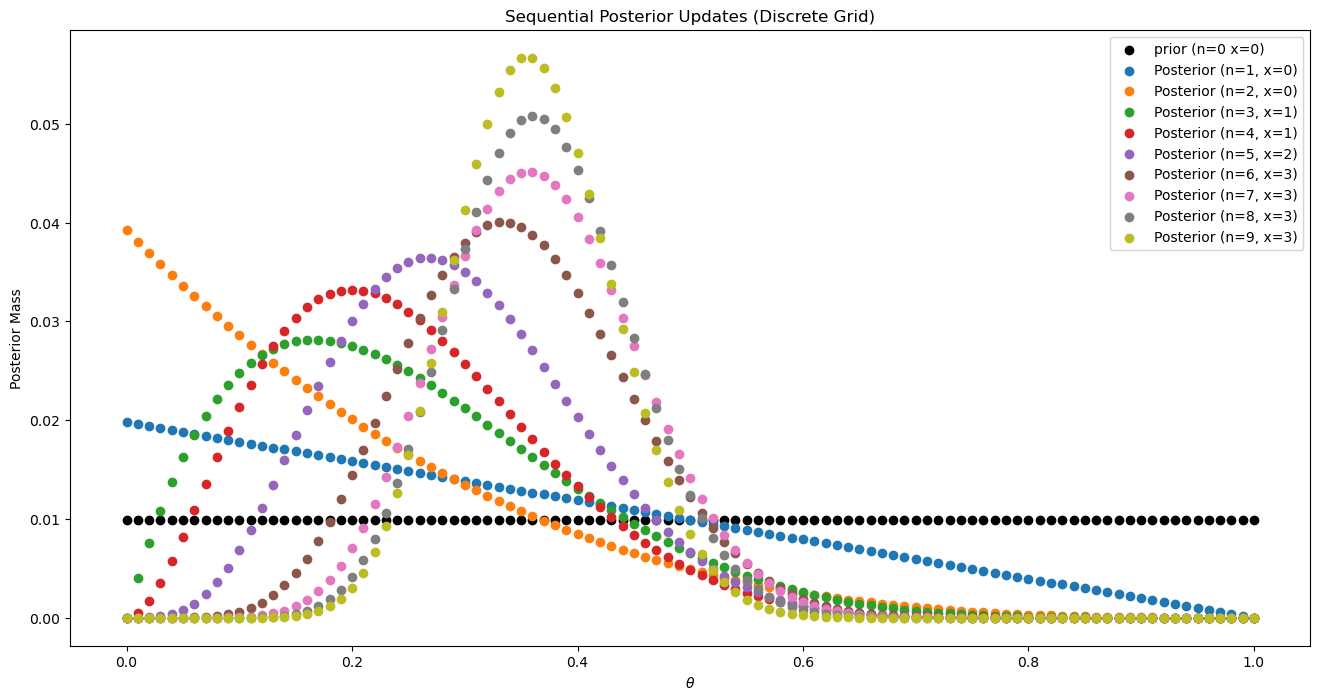

In [1]:
# Q1

import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

parameter_domain = np.linspace(0,1,101) 
prior = np.ones(101)/101 

observations = 0,0,1,0,1,1,0,0,0
n,x = 0,0
plt.figure(figsize=(16,8))
plt.scatter(parameter_domain, prior, label="prior (n="+str(n)+" x="+str(x)+")", color='k')
plt.title("These are discrete posterior distributions: All point heights sum to 1 for each sequential distribution")

for observation in observations:
    n += 1
    x += observation
    # use these for batch updates based on a binomial distribution
    likelihood = stats.binom.pmf(x, n, parameter_domain)
    posterior = prior * likelihood
    # or do updates in a truly sequential manner using Bernoulli
    # prior = posterior  # for each Bernoulli observation update
    posterior /= posterior.sum()
    # plt.scatter(parameter_domain, posterior, label="posterior (n="+str(n)+" x="+str(x)+")")
    plt.scatter(parameter_domain, posterior,
                label=f'Posterior (n={n}, x={x})')
    prior = posterior

plt.title("Sequential Posterior Updates (Discrete Grid)")
plt.xlabel(r"$\theta$")
plt.ylabel("Posterior Mass")
plt.legend()
plt.show()   

## Bayesian/Sequential Learning

A prior is updated to a posterior which becomes the new prior for the next data

\begin{array}{llll}
1.&&\!\!\!\!\!\!&\!\!\!\!\!\!p(\theta | x_1) \propto {} f(x_1|\theta)p(\theta) \\
2.&&\!\!\!\!\!\! p(\theta | x_1, x_2) \propto f(x_2|\theta)&\!\!\!\!\!\!p(\theta | x_1) \\
3.&p(\theta | x_1, x_2, x_3) \propto{} f(x_3|\theta) & \!\!\!\!\!\! p(\theta | x_1, x_2)  \\
\vdots\\
\end{array}

### But this is the same as a single batch update

$$p(\theta | x_1, x_2, x_3) \propto f(x_1,x_2,x_3|\theta)p(\theta)
\overset{(x_i \perp\!\!\perp x_j | \theta)}{=} \underbrace{f(x_1|\theta)f(x_2|\theta)f(x_3|\theta)p(\theta)}_{\left[ \prod_{i=1}^{3}f(x_i|\theta)\right]p(\theta)} $$

## Conditional Independence

\begin{align*}
\text{Conditional Independence} && p(x_2|\theta) &={} p(x_2|x_1,\theta) \; \text{ or } \; (x_2 \perp\!\!\!\perp x_1 | \theta)
\end{align*}

\begin{align*}
p(\theta|x_2,x_1) &\propto{} p(x_2, x_1, \theta)\\
& = {} \underbrace{p(x_2| \theta, x_1)} p(x_1 | \theta) p(\theta)
\color{gray}{\longleftarrow \text{chain rule}}\\
& \quad (x_2 \perp\!\!\!\perp x_1 | \theta)\\
& = {} \overbrace{\;\;p(x_2| \theta)\;\;} \underbrace{p(x_1 | \theta) p(\theta)}_{\propto \; p(\theta|x_1)}\\
&\propto{}  p(x_2| \theta) \underbrace{p(\theta | x_1)}_{\text{new prior}} \longleftarrow \text{previous posterior}
\end{align*}

A prior is updated to a posterior which becomes the new prior for the next data

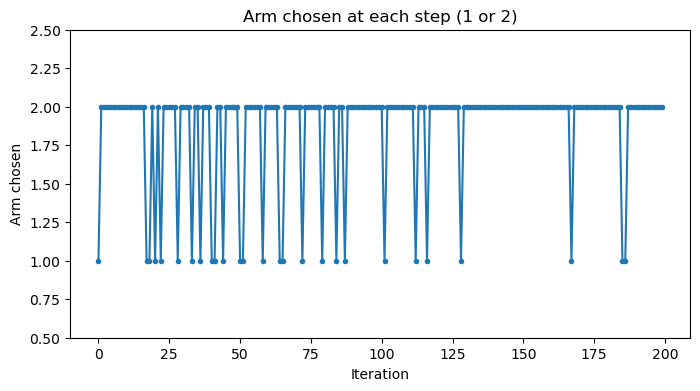

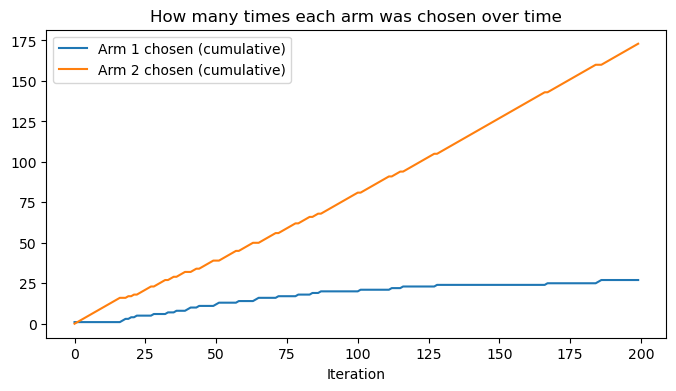

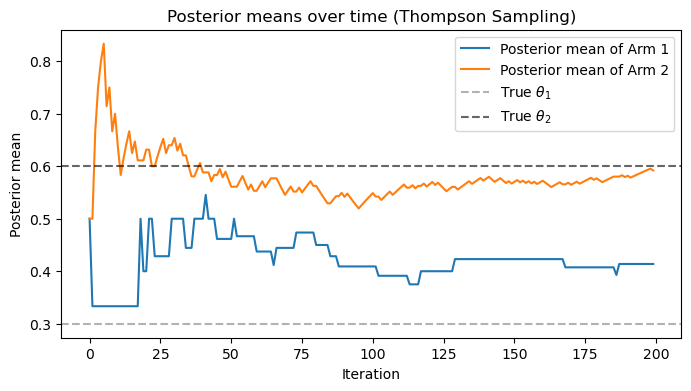

In [3]:
# Q2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, bernoulli

# True success probabilities for the two arms
theta1_true = 0.3
theta2_true = 0.6

# Initialize counters for each arm:
# n_j = total trials for arm j, x_j = total successes for arm j
n1, x1 = 0, 0
n2, x2 = 0, 0

# Lists to record which arm was chosen, the observed reward, and posterior parameters at each step
choices = []
rewards = []
posterior_params = []  # will store (alpha1, beta1, alpha2, beta2)

# Number of iterations (pulls) we will simulate
T = 200

for t in range(T):
    # Posterior parameters for each arm (Beta(1 + x_j, 1 + n_j - x_j))
    alpha1, beta1 = 1 + x1, 1 + (n1 - x1)
    alpha2, beta2 = 1 + x2, 1 + (n2 - x2)
    
    # Thompson Sampling:
    # 1) Draw one sample from each arm's Beta posterior
    sample_arm1 = np.random.beta(alpha1, beta1)
    sample_arm2 = np.random.beta(alpha2, beta2)
    
    # 2) Choose the arm whose sampled value is higher
    if sample_arm1 > sample_arm2:
        choice = 1
        # Observe a Bernoulli reward from arm 1
        reward = bernoulli.rvs(theta1_true)
        # Update arm 1 counters
        n1 += 1
        x1 += reward
    else:
        choice = 2
        # Observe a Bernoulli reward from arm 2
        reward = bernoulli.rvs(theta2_true)
        # Update arm 2 counters
        n2 += 1
        x2 += reward
    
    # Record this iteration's choice, reward, and posterior parameters
    choices.append(choice)
    rewards.append(reward)
    posterior_params.append((alpha1, beta1, alpha2, beta2))

# --- Visualization 1: Which arm was chosen at each iteration
plt.figure(figsize=(8,4))
plt.plot(choices, 'o-', markersize=3)
plt.title("Arm chosen at each step (1 or 2)")
plt.xlabel("Iteration")
plt.ylabel("Arm chosen")
plt.ylim(0.5, 2.5)
plt.show()

# --- Visualization 2: Cumulative times each arm was chosen
cumulative_choices_arm1 = np.cumsum([1 if c == 1 else 0 for c in choices])
cumulative_choices_arm2 = np.cumsum([1 if c == 2 else 0 for c in choices])

plt.figure(figsize=(8,4))
plt.plot(cumulative_choices_arm1, label="Arm 1 chosen (cumulative)")
plt.plot(cumulative_choices_arm2, label="Arm 2 chosen (cumulative)")
plt.title("How many times each arm was chosen over time")
plt.xlabel("Iteration")
plt.legend()
plt.show()

# --- Visualization 3: Posterior means evolving over time
arm1_means = []
arm2_means = []
for (a1, b1, a2, b2) in posterior_params:
    mean1 = a1 / (a1 + b1)
    mean2 = a2 / (a2 + b2)
    arm1_means.append(mean1)
    arm2_means.append(mean2)

plt.figure(figsize=(8,4))
plt.plot(arm1_means, label="Posterior mean of Arm 1")
plt.plot(arm2_means, label="Posterior mean of Arm 2")
plt.axhline(theta1_true, color='gray', linestyle='--', alpha=0.6, label=r"True $\theta_1$")
plt.axhline(theta2_true, color='black', linestyle='--', alpha=0.6, label=r"True $\theta_2$")
plt.title("Posterior means over time (Thompson Sampling)")
plt.xlabel("Iteration")
plt.ylabel("Posterior mean")
plt.legend()
plt.show()


Q3

When comparing the independent Beta–Binomial analysis and the joint Dirichlet–Multinomial approach, the key factors is how much we expect the three arms to share information. If the three entities are believed to be independent—like learning about one arm’s success rate conveys no information about the others—then modeling each arm separately with a Beta prior and binomial likelihood is typically simpler and entirely sufficient. This approach, paired with a multi-armed bandit strategy such as Thompson Sampling, will effectively balance exploration that is testing all arms sufficiently to learn their success probabilities and exploitation that is focusing on the arm that appears to have the highest probability of success.

However, if there are reasons to show that the three arms have correlated or partially parameters(for example, if they share underlying features or data-generating processes that make their success rates interdependent), then a Dirichlet–Multinomial model can be more appropriate. In this case, inferences about one arm can inform the others, and the posterior distributions of their success parameters are learned jointly. The trade-off is increased model complexity and a need for more careful prior specification.

A real-world AB(C) testing scenario might be an online retailer evaluating three homepage designs, each with a distinct interface for inviting customers to sign up for an account. By maintaining Beta posteriors for each design and using Thompson Sampling, the retailer ensures that, over time, more flow is allocated to the arm(version) with the highest inferred conversion rate, while still exploring alternatives to remain the possibility that a different design might ultimately perform better than now.